In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Part A – Data Preprocessing 

In [103]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [104]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


Data Sudah dibersikan ce minoque, tidak ada data yang saya drop karena semuanya penting

In [106]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

In [107]:
df.drop(columns=['Terjual/Belum'], inplace=True)

Column Terjual/Belum saya drop karena isinya cuma belum

# Exploratory Data Analysis

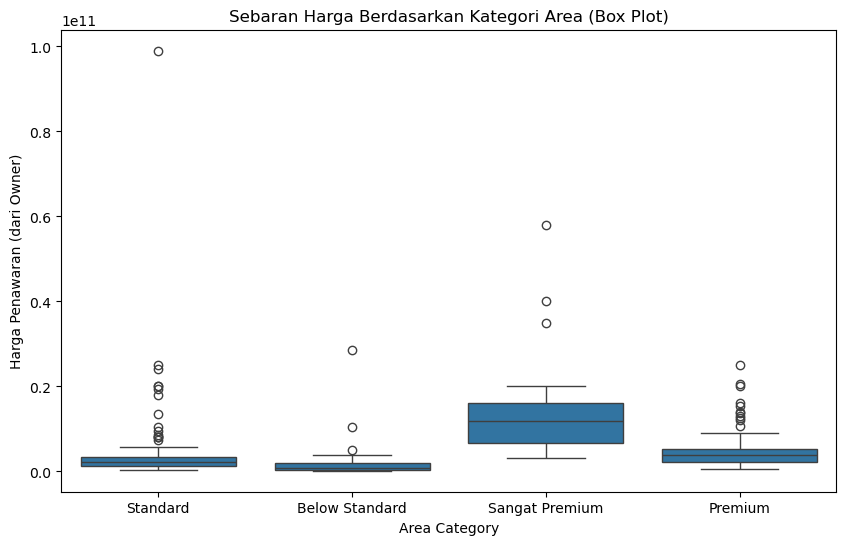

In [108]:
plt.figure(figsize=(10, 6))

# Seaborn sangat pintar dalam menangani data kategorikal
sns.boxplot(x='Area Category', y='Harga Penawaran (dari Owner)', data=df)

plt.title('Sebaran Harga Berdasarkan Kategori Area (Box Plot)')
plt.xlabel('Area Category')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.show()

area Rumah Below Standart, Standart memiliki AVG harga yang mirip. untuk rumah premium ada yang memiliki harga murah, dan untuk rumah di area sangat premium harganya paling tinggi

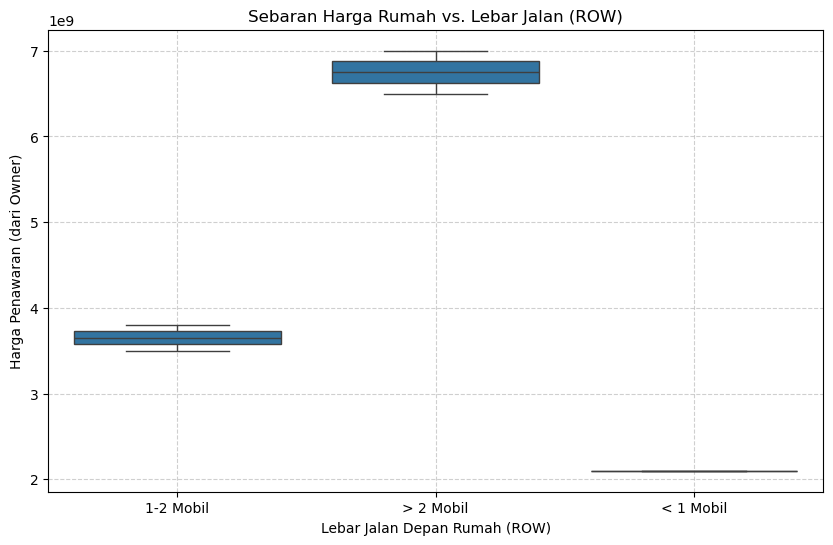

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- ASUMSIKAN DATA ANDA SUDAH BERSIH ---
# (Ini hanya data contoh untuk demonstrasi)
data_bersih = {
    'Lebar Jalan Depan Rumah (ROW)': ['1-2 Mobil', '> 2 Mobil', '< 1 Mobil', '1-2 Mobil', '> 2 Mobil'],
    'Harga Penawaran (dari Owner)': [3.5e9, 7.0e9, 2.1e9, 3.8e9, 6.5e9]
}
df_Baru = pd.DataFrame(data_bersih)
# ------------------------------------------


# --- Ini adalah kode untuk membuat plotnya ---

plt.figure(figsize=(10, 6))

# sns.boxplot adalah cara termudah untuk plot kategori vs angka
sns.boxplot(x='Lebar Jalan Depan Rumah (ROW)', 
            y='Harga Penawaran (dari Owner)', 
            data=df_Baru)

plt.title('Sebaran Harga Rumah vs. Lebar Jalan (ROW)')
plt.xlabel('Lebar Jalan Depan Rumah (ROW)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Semakin lebar jalan semakin mahal harga rumah

# Data Preparation for Clustering

In [110]:
df = df.copy()

# Mapping untuk Education
areaCategory_mapping = {'Below Standard': 0, 'Standard': 1, 'Premium': 2, 'Sangat Premium': 3}
df['Area Category'] = df['Area Category'].map(areaCategory_mapping)

# Mapping untuk poutcome
Lebar_mapping = {'< 1 Mobil': 0, '1-2 Mobil': 1, '> 2 Mobil': 2}
df['Lebar Jalan Depan Rumah (ROW)'] = df['Lebar Jalan Depan Rumah (ROW)'].map(Lebar_mapping)

#Encode Nominal
nominal_cols = ['Arah Hadap Rumah', 'Posisi Rumah', 'Nama Daerah']
encoder = OrdinalEncoder()
df[nominal_cols] = encoder.fit_transform(df[nominal_cols])

encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df.sample(n = 5)

{'Arah Hadap Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Nama Daerah': {'Anjasmoro': 0,
                 'Araya': 1,
                 'Asemrowo': 2,
                 'Babatan': 3,
                 'Babatan Pantai': 4,
                 'Baratajaya': 5,
                 'Bendul Merisi': 6,
                 'Bratang Gede': 7,
                 'Bubutan': 8,
                 'Bulak Cumpat barat': 9,
                 'Ciliwung': 10,
                 'Citraland': 11,
                 'Citraland ': 12,
                 'Citraland Golf Avenue': 13,
                 'Citraland Utara': 14,
                 'Darmahusada': 15,
                 'Darmo': 16,
                 'Darmo Permai': 17,
                 'Diponegoro': 18,
                 'Dukuh Pakis': 19,
                 'Dukuh Sutorejo': 20,
                 'Gading': 21,
                 'Gading Indah Regency': 22,
                 'Galaxy Bumi Permai': 23,
                 'Gayungan': 24,
                 'Gayungsari': 

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
85,1,106.0,275,260,3,2,1,3500000000,3.0,2.0,1
151,3,11.0,364,450,6,5,2,9500000000,3.0,2.0,1
150,3,27.0,900,1100,6,5,2,58000000000,3.0,3.0,2
47,0,58.0,32,16,2,1,2,260000000,3.0,2.0,1
15,1,30.0,84,120,4,2,2,1350000000,1.0,2.0,2


In [111]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy()

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi'])
df_scaled.head()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi
0,0.064760,0.156529,-0.168161,-0.207847
1,-0.977457,-0.971209,-1.386831,-1.438941
2,-0.282646,-0.454330,0.441174,0.407700
3,-0.198276,-0.078417,0.441174,1.023247
4,0.610683,1.566201,0.441174,1.023247


In [112]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00


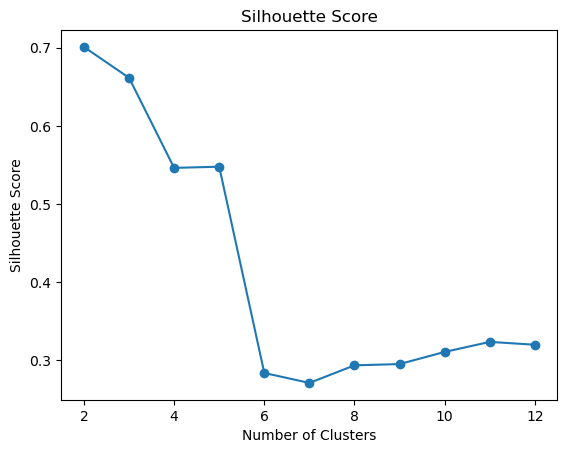

In [113]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 13):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 13), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


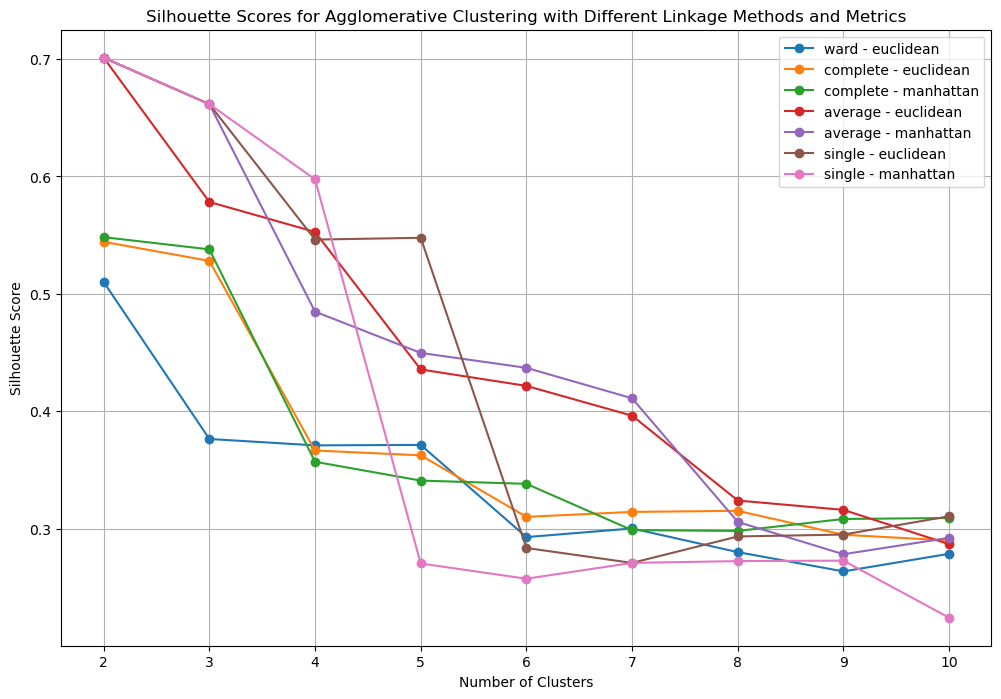

Best Silhouette Score: 0.7010878323273823
Optimal Number of Clusters: 2
Optimal Linkage Method: average
Optimal Metric: euclidean


In [114]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

# Hierarchical Clustering Modeling

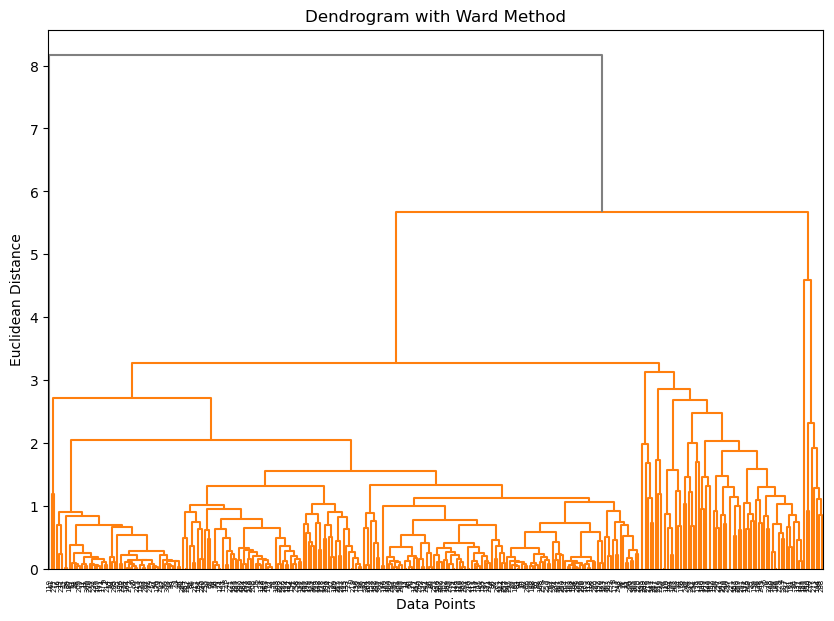

In [115]:
# Ward Method
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

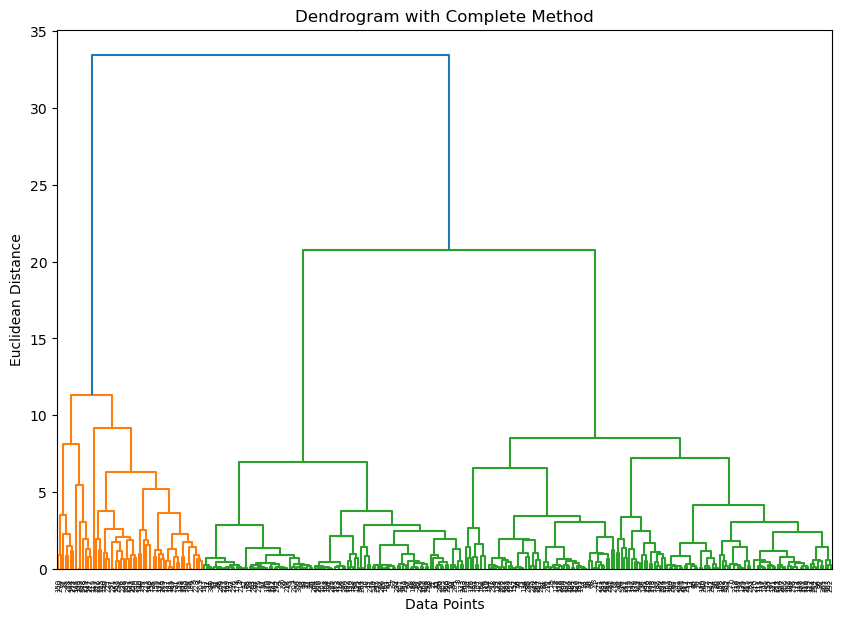

In [116]:
# Max Distance
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [117]:
# Hierarchical Clustering Method 1
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7010878323273823


In [118]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc = agglo.fit_predict(df_scaled)

ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.5100818232176496


In [119]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,1,11.0,240,300,4,3,2,3500000000,3.0,2.0,1,0
1,0,100.0,30,60,2,1,2,287799000,3.0,2.0,0,0
2,1,48.0,170,170,5,4,2,2699999999,1.0,0.0,1,0
3,3,48.0,187,250,5,5,2,3100000000,3.0,2.0,1,0
4,2,48.0,350,600,5,5,2,5000000000,0.0,2.0,1,1


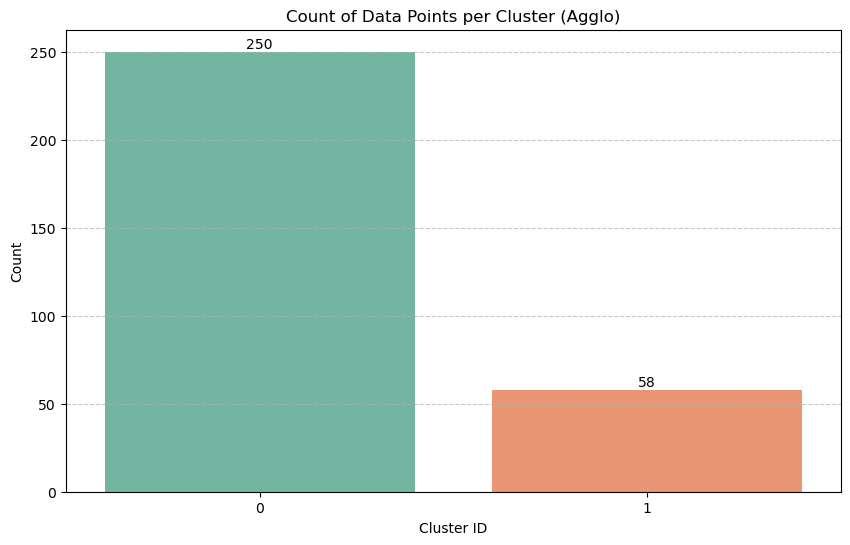

In [120]:
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

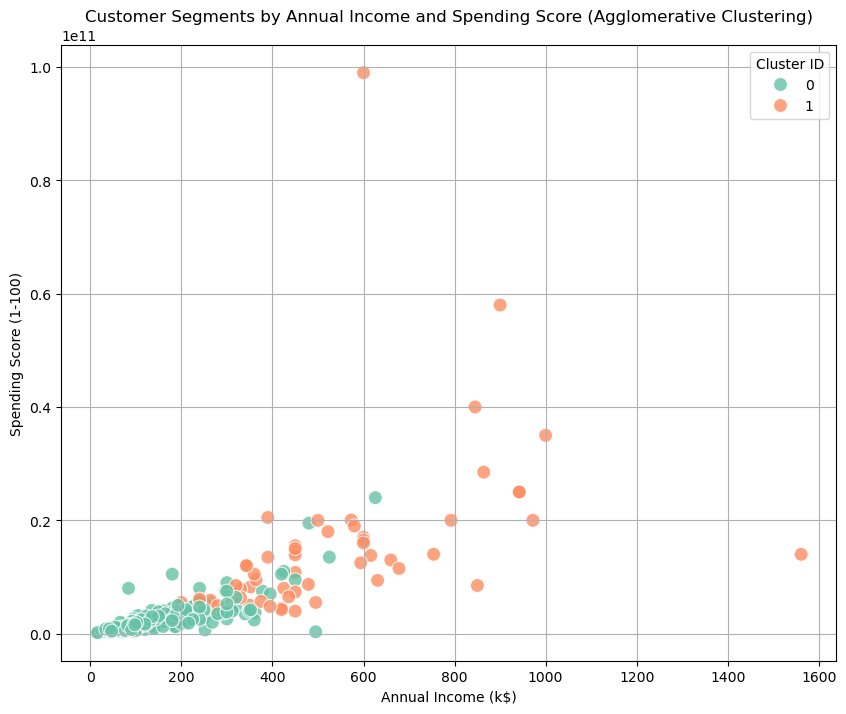

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah (m2)', y='Harga Penawaran (dari Owner)', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Annual Income and Spending Score (Agglomerative Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [123]:

import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah (m2)'
y_col = 'Luas Bangunan (m2)'
z_col = 'Harga Penawaran (dari Owner)'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

In [125]:
df.head(10)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,1,11.0,240,300,4,3,2,3500000000,3.0,2.0,1,0
1,0,100.0,30,60,2,1,2,287799000,3.0,2.0,0,0
2,1,48.0,170,170,5,4,2,2699999999,1.0,0.0,1,0
3,3,48.0,187,250,5,5,2,3100000000,3.0,2.0,1,0
4,2,48.0,350,600,5,5,2,5000000000,0.0,2.0,1,1
5,2,48.0,450,530,5,6,2,10800000000,3.0,2.0,1,1
6,0,30.0,96,60,2,1,1,390000000,3.0,2.0,1,0
7,2,30.0,85,100,3,2,2,725000000,3.0,2.0,1,0
8,0,98.0,72,120,4,1,1,775000000,0.0,3.0,0,0
9,1,30.0,50,100,2,2,2,850000000,3.0,2.0,1,0


Kebanyakan rumah berada di kelompok 0, dimana harga rumah di sana lebih murah dari pada rumah rumah di kelompok 1.

saran saya untuk rumah kelompok 0, mungkin bisa lebih menargetkan kepada anak muda yang baru merintis, jadi buat iklan yang lebih menyasar ke gen-z dan coba buat design nya lebih gen-z able

untuk rumah di kelompok 1, mungkin bisa menargetkan orang orang yang lebih kaya, dengan promosi di moll, dan lahan luas